Quickly draw ADC spectrum vs TDC of a measured source

e.g. $^{60}$Co 

In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/analysis/Python'); 
from PETsys_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'

In [10]:
sec = 1.e12
nanosec = sec*1e-9
microsec = sec*1e-6
milisec = sec*1e-3

dT = 100
filename = '/Users/erezcohen/Desktop/data/PETsys/Prototype1/Cf252_source_1uC_24Nov2020/Cf252_100sec_single.dat'

In [6]:
singles = pd.read_csv(filename,delimiter='\t',names=['time','charge','channel'])

In [7]:
channels = np.unique(singles.channel)
print 'detected events in the following channels: ',channels
singles_per_channel = dict()
for ch in channels:
    singles_per_channel[ch] = singles[singles.channel==ch]    
    print 'channel', ch,':',float(len(singles_per_channel[ch]))/dT,'events/sec in sig+bkg'
print 'done grouping'

detected events in the following channels:  [ 84  85 213 226]
channel 84 : 0.01 events/sec in sig+bkg
channel 85 : 208.41 events/sec in sig+bkg
channel 213 : 384.43 events/sec in sig+bkg
channel 226 : 432.94 events/sec in sig+bkg
done grouping


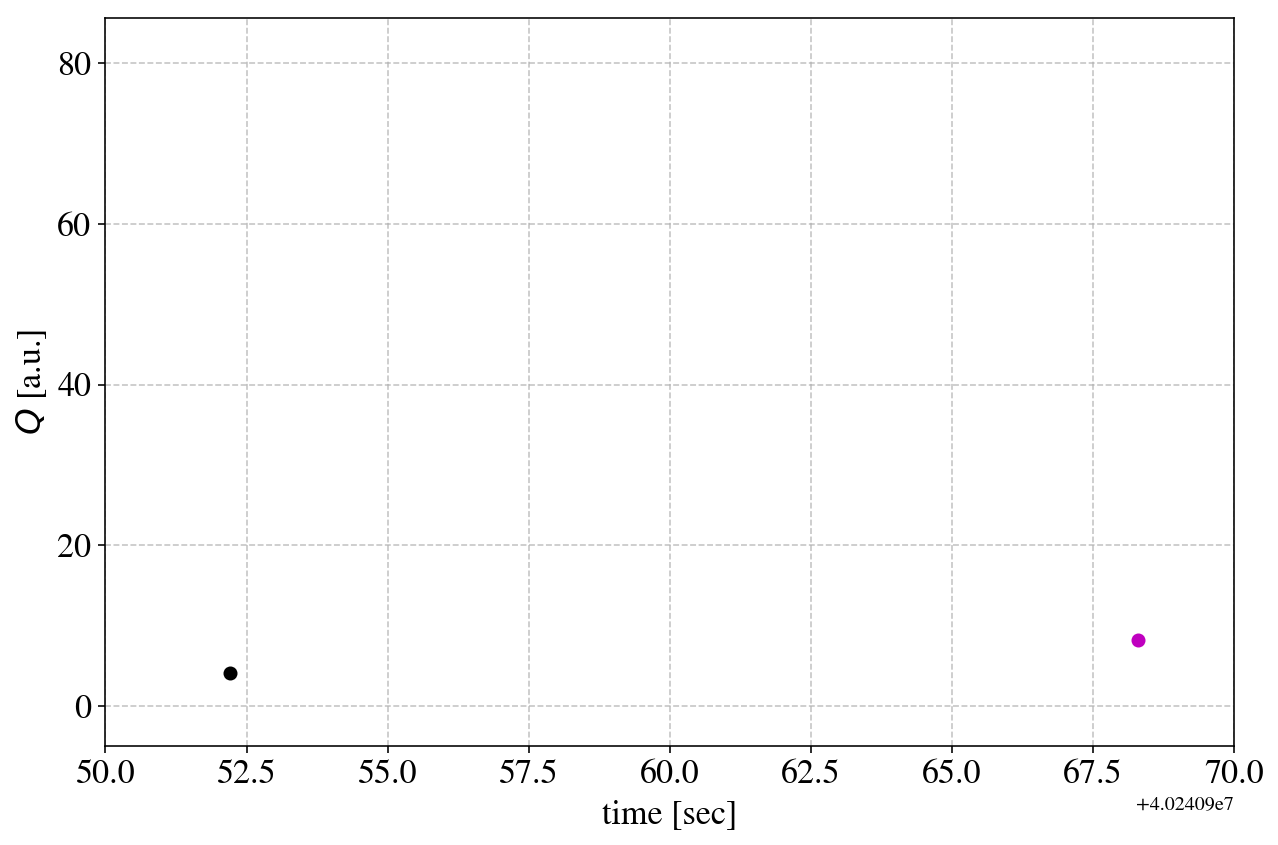

In [31]:
fig=plt.figure(figsize=(9,6));
ax=fig.add_subplot(111)
for i,ch,color in zip([1,2,3,4],channels,['r','b','k','m']):#162,226,    
    q = lineariseChargeDeposited(singles_per_channel[ch].charge)
    t = singles_per_channel[ch].time
    
    plt.scatter(t/microsec,q,label='channel %d'%ch,color=color)
    
set_axes(ax=ax,x_label='time [sec]',y_label='$Q$ [a.u.]',xlim=(40240950.0,40240970.),
         fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');
plt.tight_layout()    